# Plotting sea ice time series and histograms

### Author: Chris Wyburn-Powell, find the most up-to-date version on [github](https://github.com/chrisrwp/ATOC_4500) <br>

#### **ATOC 4500-003**, Fall 2021 at CU Boulder. Taught by Professor Alexandra Jahn, and teaching assistant Chris Wyburn-Powell <br>

**This notebook provides an intoduction to CMIP5 Large Ensembles and CMIP6 models for sea ice. The plotting examples are for sea ice area (SIA), but sea ice extent (SIE) and sea ice volume (SIV) can be plotted in the same way** <br>

**Skills learned:**
- Opening `NetCDF` and `text` files
- Manipulating `xarray` datatsets
- Plotting time series and histograms with `matplotlib`
- Calculating a normal distribution with `scipy`

## Import libraries, documentation linked below:
- [`pandas`](https://pandas.pydata.org/) Data analysis, particularly useful for `txt` and `csv` files
- [`numpy`](https://numpy.org/) Scientific arrays with easy computation across elements
- [`xarray`](http://xarray.pydata.org/en/stable/) Multi-dimensional labeled arrays, built on numpy and pandas
- [`matplotlib`](https://matplotlib.org/) Plotting library built on matlab functionality
- [`scipy`](https://www.scipy.org/) Statistics
- [`datetime`](https://docs.python.org/3/library/datetime.html) Computation with dates and times

In [117]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

# Load the data 
**Firstly define the path to the directory where you have saved the data** <br>
**We can use `Linux` commands within Jupyter notebooks if you preface your code with an** `!`

In [46]:
!pwd

/Users/chwy8767/Downloads/Reduced_datasets


In [47]:
data_path = '/Users/chwy8767/Downloads/ATOC_4500/'

**Open the data with** `xarry`

In [192]:
SIA_CMIP5 = xr.open_dataset(data_path+'CLIVAR_CMIP5_SIA_SIE_SIV/CLIVAR_SIA_1850_2100_RCP85.nc')

In [193]:
SIA_CMIP5 #have a look at the dataset

<xarray.Dataset>
Dimensions:     (member: 100, time: 3012)
Coordinates:
  * member      (member) int64 1 2 3 4 5 6 7 8 9 ... 92 93 94 95 96 97 98 99 100
  * time        (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    CanESM2     (member, time) float32 ...
    CESM1       (member, time) float32 ...
    CSIRO_MK36  (member, time) float32 ...
    GFDL_CM3    (member, time) float32 ...
    GFDL_ESM2M  (member, time) float32 ...
    MPI_ESM1    (member, time) float32 ...
Attributes:
    Description:  Arctic sea ice area (SIA) for the large ensemble models: Ca...
    Units:        million square km
    Timestamp:    19:56 UTC Tue 2021-06-22
    Data source:  CLIVAR Large Ensemble Archive, doi:10.1038/s41558-020-0731-2
    Analysis:     https://github.com/chrisrwp/synthetic-ensemble/SIA/SIC_to_S...

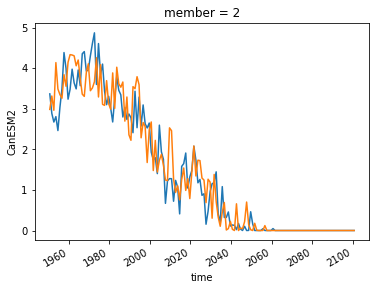

In [194]:
#quickly plot a couple of members from the CanESM2 large ensemble
model_name = 'CanESM2'
month_ = 9
SIA_CMIP5[model_name].sel(time=SIA_CMIP5['time.month']==month_).sel(member=1).plot()
SIA_CMIP5[model_name].sel(time=SIA_CMIP5['time.month']==month_).sel(member=2).plot();

## Plot the ensemble member mean and standard deviation

In [130]:
model_names  = ['CanESM2', 'CESM1', 'CSIRO_MK36', 'GFDL_CM3', 'GFDL_ESM2M', 'MPI_ESM1' ]
month_names  = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'November', 'December']
mem_len      = [50,        40,      30,           20,         30,           100        ]
model_starts = [1950,      1920,    1850,         1920,       1950,         1850       ]
colors       = ['m',       'b',     'g',          'orange',   'k',          'tab:olive']

/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/local_2020_11_18/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty sli

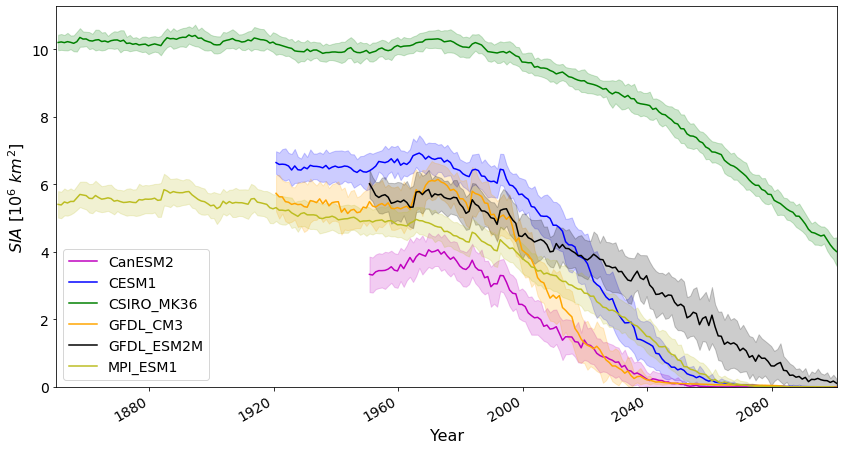

In [196]:
month_ = 9 #choose the month

plt.figure(figsize=[14,7]) #initialize a matplotlib figure of size 14,7 inches

########## loop through the 6 models ##########
for model_i, model_name in enumerate(list(SIA_CMIP5.keys())): 
    #select the month and model we're looking for
    model_data = SIA_CMIP5[model_name].sel(time=SIA['time.month']==month_)
    
    if model_name == 'CESM1':
        model_data = model_data.sel(time=slice('1920','2100')) #CESM1 only has 1 member 1850-1920, don't plot for those years
    
    model_data.mean('member').plot(c=colors[model_i], label=model_name) #plot the member mean
    
    #plot the standard deviation as shading above and below the mean
    plt.fill_between(model_data['time'].values, model_data.mean('member') - model_data.std('member'), 
                     model_data.mean('member') + model_data.std('member'), color=colors[model_i], alpha=0.2)


########## after all models have been plotted, improve axes ##########
plt.legend(fontsize=14) #make the legend font size larger

plt.xlim(SIA['time'].min().values, SIA['time'].max().values) #remove white space at the edges of the x axis
plt.xlabel('Year', fontsize=16);
plt.xticks(fontsize=14)

plt.ylim(bottom=0)
plt.ylabel(r'$SIA \ [10^6 \ km^2]$', fontsize=16) #you can use latex in matplotlib with this syntax
plt.yticks(fontsize=14);

# Plot historgrams of the SIA data

**Select MPI ESM1 for the years 1850-1960 where there is a small trend - are years and members normally distributed?**


In [199]:
MPI_Sep_1850_1960 = SIA_CMIP5['MPI_ESM1'].sel(time=SIA_CMIP5['time.month']==month_).sel(time=slice('1850','1960'))

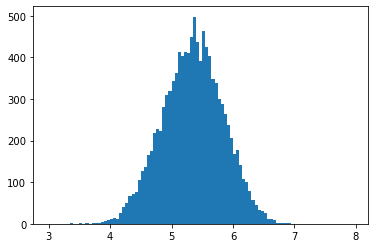

In [200]:
plt.hist(np.ravel(MPI_Sep_1850_1960), bins=np.arange(3,8,0.05)); #we need np.ravel to make the data 1D

## Plot a Gaussian curve to the histogram
**See if the data looks normally distributed**

In [204]:
def PDF(data):
    '''
    Caclulates x values and corresponding probabilities for an xarray data array
    
    Parameters
    ----------
    data : an array of most types and shapes,
        This should be the same data you input into matplotlib.pyplot.hist
    
    Returns
    ----------
    x_vals: numpy array
        100 elements equally spaced along the x axis, -5 standard deviations to +5 from the mean
    probs: numpy array
        The 100 corresponding probabilities to the x_vals
    '''
    
    distrib = stats.norm(np.mean(data), np.std(data))
    x_vals  = np.linspace(np.mean(data)-np.std(data)*5, np.mean(data)+np.std(data)*5,100)
    probs   = [distrib.pdf(x) for x in x_vals]
    
    return(x_vals, probs)

In [205]:
help(PDF) #a quick way of looking up how a function works 
#this can be quicker than going through the documentation of large libraries e.g. numpy - try help(np.mean)

Help on function PDF in module __main__:

PDF(data)
    Caclulates x values and corresponding probabilities for an xarray data array
    
    Parameters
    ----------
    data : an array of most types and shapes,
        This should be the same data you input into matplotlib.pyplot.hist
    
    Returns
    ----------
    x_vals: numpy array
        100 elements equally spaced along the x axis, -5 standard deviations to +5 from the mean
    probs: numpy array
        The 100 corresponding probabilities to the x_vals



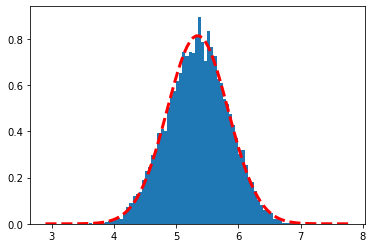

In [202]:
gaussian_vals = PDF(MPI_Sep_1850_1960.values)

plt.hist(np.ravel(MPI_Sep_1850_1960), bins=np.arange(3.5,7,0.05), density=True);
plt.plot(gaussian_vals[0], gaussian_vals[1], color='r', linestyle='--', linewidth=3);

# CMIP6 data
**Now load the data for CMIP6 models** <br>

**First, let's look at the** `SIA_CMIP6_ssp585_September.txt` **file using a Linux command** `!head` <br>
N.B Linux commands can be used in Jupyter notebooks by starting your line with `!`

In [44]:
!head /Users/chwy8767/Downloads/ATOC_4500/SIA_CMIP6/SIA_CMIP6_ssp585_September.txt

Year,ACCESS-CM2,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,BCC-ESM1,CAMS-CSM1-0,CESM2,CESM2-WACCM,CNRM-CM6-1,CNRM-ESM2-1,CanESM5,E3SM-1-0,EC-Earth3,EC-Earth3-Veg,FGOALS-f3-L,GFDL-CM4,GFDL-ESM4,GISS-E2-1-G,GISS-E2-1-G-CC,GISS-E2-1-H,HadGEM3-GC31-LL,HadGEM3-GC31-MM,INM-CM4-8,INM-CM5-0,IPSL-CM6A-LR,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorCPM1,NorESM2-LM,SAM0-UNICON,UKESM1-0-LL
2015,4.406589984893799,3.857943296432495,2.587466239929199,5.391728401184082,nan,7.455785751342773,1.3208496570587158,2.7845606803894043,4.713279724121094,nan,4.347983360290527,nan,4.215883255004883,3.428784132003784,nan,4.877619743347168,4.403291702270508,nan,nan,nan,4.123,3.949,6.643649101257324,4.962826251983643,2.4835317134857178,3.3914051055908203,3.6581618785858154,3.3840980529785156,3.296125888824463,2.3125009902789486,1.7514697313308716,nan,4.4202985763549805,nan,5.749
2016,4.87993049621582,3.166712522506714,3.0510528087615967,5.045109272003174,nan,7.229918003082275,1.8575167655944824,

**That output is rather messy, let's use `pandas` to open it nicely in Python**

In [98]:
CMIP6_09_SSP585 = pd.read_csv(data_path+'SIA_CMIP6/SIA_CMIP6_ssp585_September.txt')

In [99]:
CMIP6_09_SSP585 #pandas plots this in a much easier to read way!

,Year,ACCESS-CM2,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,BCC-ESM1,CAMS-CSM1-0,CESM2,CESM2-WACCM,CNRM-CM6-1,...,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorCPM1,NorESM2-LM,SAM0-UNICON,UKESM1-0-LL
0,2015,4.406590,3.857943,2.587466e+00,5.391728e+00,NaN,7.455786,1.320850e+00,2.784561e+00,4.713280e+00,...,3.391405e+00,3.658162,3.384098,3.296126,2.312501,1.751470,NaN,4.420299,NaN,5.749
1,2016,4.879930,3.166713,3.051053e+00,5.045109e+00,NaN,7.229918,1.857517e+00,3.102661e+00,3.937201e+00,...,3.104763e+00,4.111732,3.046408,3.481300,2.007540,0.699148,NaN,4.592876,NaN,5.559
2,2017,4.308875,2.704105,1.831351e+00,5.420196e+00,NaN,7.211846,1.686310e+00,3.846879e+00,4.621352e+00,...,3.541585e+00,4.245116,3.453690,3.801275,1.973420,1.368010,NaN,4.651590,NaN,5.317
3,2018,3.662474,1.649624,2.321814e+00,4.791596e+00,NaN,7.161072,1.617119e+00,3.321621e+00,4.747656e+00,...,3.161900e+00,3.960479,2.161751,3.484514,1.490444,0.761366,NaN,4.505673,NaN,4.719
4,2019,3.031529,3.721829,2.809926e+00,4.120670e+00,NaN,6.759803,8.951776e-01,3.858094e+00,3.941736e+00,...,3.353808e+00,3.599726,2.746297,2.856038,0.808938,0.353411,NaN,4.164373,NaN,5.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2095,0.000233,0.006115,1.065576e-06,1.034368e-08,NaN,1.537749,3.845164e-10,7.368922e-06,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.005240,0.000349,NaN,0.005083,NaN,0.000
81,2096,0.000693,0.008460,5.961600e-06,0.000000e+00,NaN,2.907932,8.773751e-10,5.203389e-08,0.000000e+00,...,1.421549e-07,0.000000,0.000000,0.000000,0.007186,0.000061,NaN,0.018723,NaN,0.000
82,2097,0.005390,0.003602,1.519157e-07,0.000000e+00,NaN,1.359600,0.000000e+00,6.021750e-07,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000174,0.006396,0.000084,NaN,0.014101,NaN,0.000
83,2098,0.000101,0.003784,2.879893e-08,3.796759e-04,NaN,1.656973,0.000000e+00,8.072311e-10,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.004120,0.000272,NaN,0.001168,NaN,0.000


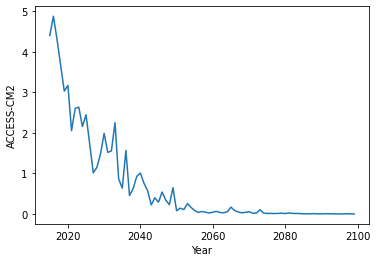

In [133]:
CMIP6_09_SSP585['ACCESS-CM2'].plot(); #quickly plot the data from one model

**Now let's convert the** `pandas DataFrame` **into an xarray dataset**

In [100]:
CMIP6_09_SSP585 = xr.Dataset(CMIP6_09_SSP585)
CMIP6_09_SSP585

<xarray.Dataset>
Dimensions:          (dim_0: 85)
Coordinates:
  * dim_0            (dim_0) int64 0 1 2 3 4 5 6 7 8 ... 77 78 79 80 81 82 83 84
Data variables:
    Year             (dim_0) int64 2015 2016 2017 2018 ... 2096 2097 2098 2099
    ACCESS-CM2       (dim_0) float64 4.407 4.88 4.309 ... 0.0001012 0.0004091
    ACCESS-ESM1-5    (dim_0) float64 3.858 3.167 2.704 ... 0.003784 0.007022
    AWI-CM-1-1-MR    (dim_0) float64 2.587 3.051 1.831 ... 2.88e-08 3.342e-08
    BCC-CSM2-MR      (dim_0) float64 5.392 5.045 5.42 ... 0.0003797 0.0001707
    BCC-ESM1         (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    CAMS-CSM1-0      (dim_0) float64 7.456 7.23 7.212 7.161 ... 1.36 1.657 1.652
    CESM2            (dim_0) float64 1.321 1.858 1.686 1.617 ... 0.0 0.0 0.0
    CESM2-WACCM      (dim_0) float64 2.785 3.103 3.847 ... 8.072e-10 0.0001285
    CNRM-CM6-1       (dim_0) float64 4.713 3.937 4.621 ... 0.0 0.0 3.097e-10
    CNRM-ESM2-1      (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    CanESM5          (dim_0) float64 4.348 3.332 3.585 2.884 ... 0.0 0.0 0.0 0.0
    E3SM-1-0         (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    EC-Earth3        (dim_0) float64 4.216 5.743 5.093 4.586 ... 0.0 0.0 0.0 0.0
    EC-Earth3-Veg    (dim_0) float64 3.429 3.356 3.133 3.27 ... 0.0 0.0 0.0 0.0
    FGOALS-f3-L      (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    GFDL-CM4         (dim_0) float64 4.878 3.854 4.941 ... 5.796e-05 0.0001474
    GFDL-ESM4        (dim_0) float64 4.403 4.349 3.732 ... 0.0006664 0.0005975
    GISS-E2-1-G      (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    GISS-E2-1-G-CC   (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    GISS-E2-1-H      (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    HadGEM3-GC31-LL  (dim_0) float64 4.123 3.065 2.556 2.527 ... 0.0 0.0 0.0 0.0
    HadGEM3-GC31-MM  (dim_0) float64 3.949 4.362 3.649 3.54 ... 0.0 0.0 0.0 0.0
    INM-CM4-8        (dim_0) float64 6.644 6.671 5.9 6.385 ... 1.756 2.106 2.787
    INM-CM5-0        (dim_0) float64 4.963 5.124 5.535 ... 0.5482 0.4957 0.9268
    IPSL-CM6A-LR     (dim_0) float64 2.484 1.681 1.66 2.711 ... 0.0 0.0 0.0 0.0
    MIROC-ES2L       (dim_0) float64 3.391 3.105 3.542 3.162 ... 0.0 0.0 0.0
    MIROC6           (dim_0) float64 3.658 4.112 4.245 3.96 ... 0.0 0.0 0.0 0.0
    MPI-ESM1-2-HR    (dim_0) float64 3.384 3.046 3.454 2.162 ... 0.0 0.0 0.0 0.0
    MPI-ESM1-2-LR    (dim_0) float64 3.296 3.481 3.801 ... 0.0001737 0.0 0.0
    MRI-ESM2-0       (dim_0) float64 2.313 2.008 1.973 ... 0.00412 0.005774
    NESM3            (dim_0) float64 1.751 0.6991 1.368 ... 0.000272 0.0001039
    NorCPM1          (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    NorESM2-LM       (dim_0) float64 4.42 4.593 4.652 ... 0.001168 0.02756
    SAM0-UNICON      (dim_0) float64 nan nan nan nan nan ... nan nan nan nan nan
    UKESM1-0-LL      (dim_0) float64 5.749 5.559 5.317 4.719 ... 0.0 0.0 0.0 0.0

**We want to use** `Year` **as our coordinates for dimension 0 (**`dim_0`**) and remove** `Year` **as a variable**

In [102]:
CMIP6_09_SSP585['dim_0'] = CMIP6_09_SSP585['Year'] #we have a dimension without coordinates
CMIP6_09_SSP585 = CMIP6_09_SSP585.drop('Year').rename({'dim_0':'Year'}) #call

In [103]:
CMIP6_09_SSP585

<xarray.Dataset>
Dimensions:          (Year: 85)
Coordinates:
  * Year             (Year) int64 2015 2016 2017 2018 ... 2096 2097 2098 2099
Data variables:
    ACCESS-CM2       (Year) float64 4.407 4.88 4.309 ... 0.0001012 0.0004091
    ACCESS-ESM1-5    (Year) float64 3.858 3.167 2.704 ... 0.003784 0.007022
    AWI-CM-1-1-MR    (Year) float64 2.587 3.051 1.831 ... 2.88e-08 3.342e-08
    BCC-CSM2-MR      (Year) float64 5.392 5.045 5.42 ... 0.0 0.0003797 0.0001707
    BCC-ESM1         (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    CAMS-CSM1-0      (Year) float64 7.456 7.23 7.212 7.161 ... 1.36 1.657 1.652
    CESM2            (Year) float64 1.321 1.858 1.686 1.617 ... 0.0 0.0 0.0
    CESM2-WACCM      (Year) float64 2.785 3.103 3.847 ... 8.072e-10 0.0001285
    CNRM-CM6-1       (Year) float64 4.713 3.937 4.621 ... 0.0 0.0 3.097e-10
    CNRM-ESM2-1      (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    CanESM5          (Year) float64 4.348 3.332 3.585 2.884 ... 0.0 0.0 0.0 0.0
    E3SM-1-0         (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    EC-Earth3        (Year) float64 4.216 5.743 5.093 4.586 ... 0.0 0.0 0.0 0.0
    EC-Earth3-Veg    (Year) float64 3.429 3.356 3.133 3.27 ... 0.0 0.0 0.0 0.0
    FGOALS-f3-L      (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    GFDL-CM4         (Year) float64 4.878 3.854 4.941 ... 5.796e-05 0.0001474
    GFDL-ESM4        (Year) float64 4.403 4.349 3.732 ... 0.0006664 0.0005975
    GISS-E2-1-G      (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    GISS-E2-1-G-CC   (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    GISS-E2-1-H      (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    HadGEM3-GC31-LL  (Year) float64 4.123 3.065 2.556 2.527 ... 0.0 0.0 0.0 0.0
    HadGEM3-GC31-MM  (Year) float64 3.949 4.362 3.649 3.54 ... 0.0 0.0 0.0 0.0
    INM-CM4-8        (Year) float64 6.644 6.671 5.9 6.385 ... 1.756 2.106 2.787
    INM-CM5-0        (Year) float64 4.963 5.124 5.535 ... 0.5482 0.4957 0.9268
    IPSL-CM6A-LR     (Year) float64 2.484 1.681 1.66 2.711 ... 0.0 0.0 0.0 0.0
    MIROC-ES2L       (Year) float64 3.391 3.105 3.542 3.162 ... 0.0 0.0 0.0
    MIROC6           (Year) float64 3.658 4.112 4.245 3.96 ... 0.0 0.0 0.0 0.0
    MPI-ESM1-2-HR    (Year) float64 3.384 3.046 3.454 2.162 ... 0.0 0.0 0.0 0.0
    MPI-ESM1-2-LR    (Year) float64 3.296 3.481 3.801 ... 0.0001737 0.0 0.0
    MRI-ESM2-0       (Year) float64 2.313 2.008 1.973 ... 0.00412 0.005774
    NESM3            (Year) float64 1.751 0.6991 1.368 ... 0.000272 0.0001039
    NorCPM1          (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    NorESM2-LM       (Year) float64 4.42 4.593 4.652 ... 0.0141 0.001168 0.02756
    SAM0-UNICON      (Year) float64 nan nan nan nan nan ... nan nan nan nan nan
    UKESM1-0-LL      (Year) float64 5.749 5.559 5.317 4.719 ... 0.0 0.0 0.0 0.0

**Now let's plot all of the data in that file**

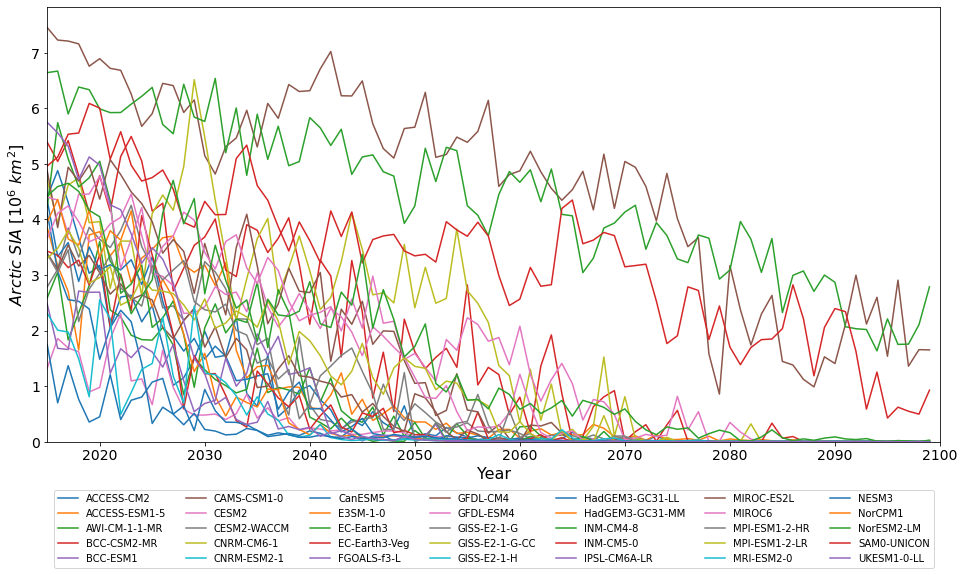

In [104]:
fig = plt.figure(figsize=[16,8])

for model in list(CMIP6_09_SSP585.keys()): #loop through all the models (xarray variables)
    CMIP6_09_SSP585[model].plot(label=model)

plt.legend(bbox_to_anchor=(0.5, -0.29), loc='lower center', borderaxespad=0., ncol=7)
plt.xlim(2015,2100)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.ylim(bottom=0)
plt.ylabel(r'$Arctic \ SIA \ [10^6 \ km^2]$', fontsize=16);
plt.yticks(fontsize=14);

# Now let's get all of the CMIP6 data into a single variable for easier manipulation with `xarray`

In [184]:
def txt_to_dataarray(file_name):
    '''
    This function loads CMIP6 text files into memory and converts them into xarray dataarrays
    
    Parameters
    ----------
    file_name : string,
        The file name of the text file, e.g. SIA_CMIP6_historical_March.txt
    
    Returns
    ----------
        xarray dataarray of the text file
    '''
    
    data = pd.read_csv(data_path+'SIA_CMIP6/'+file_name)
    data = xr.Dataset(data)
    data['dim_0'] = data['Year']
    data = data.drop('Year').rename({'dim_0':'Year'})
    
    return(data)

In [185]:
#concatenate the historical and SSP data into a single variable
SSP126_03 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_March.txt'),     txt_to_dataarray('SIA_CMIP6_ssp126_March.txt')), dim='Year')
SSP126_09 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_September.txt'), txt_to_dataarray('SIA_CMIP6_ssp126_September.txt')), dim='Year')
SSP245_03 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_March.txt'),     txt_to_dataarray('SIA_CMIP6_ssp245_March.txt')), dim='Year')
SSP245_09 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_September.txt'), txt_to_dataarray('SIA_CMIP6_ssp245_September.txt')), dim='Year')
SSP585_03 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_March.txt'),     txt_to_dataarray('SIA_CMIP6_ssp585_March.txt')), dim='Year')
SSP585_09 = xr.concat((txt_to_dataarray('SIA_CMIP6_historical_September.txt'), txt_to_dataarray('SIA_CMIP6_ssp585_September.txt')), dim='Year')

#convert all the months and SSPs into a single dataset
SIA = xr.concat((xr.concat((SSP126_03, SSP126_09), dim='month'), xr.concat((SSP245_03, SSP245_09), dim='month'), xr.concat((SSP585_03, SSP585_09), dim='month')), dim='SSP')

In [186]:
SIA #look at the dataset we've made

<xarray.Dataset>
Dimensions:          (SSP: 3, Year: 150, month: 2)
Coordinates:
  * Year             (Year) int64 1950 1951 1952 1953 ... 2096 2097 2098 2099
Dimensions without coordinates: SSP, month
Data variables:
    ACCESS-CM2       (SSP, month, Year) float64 16.27 16.06 ... 0.0004091
    ACCESS-ESM1-5    (SSP, month, Year) float64 14.98 14.85 ... 0.007022
    AWI-CM-1-1-MR    (SSP, month, Year) float64 16.64 16.63 ... 3.342e-08
    BCC-CSM2-MR      (SSP, month, Year) float64 16.52 16.43 ... 0.0001707
    BCC-ESM1         (SSP, month, Year) float64 17.33 17.05 17.5 ... nan nan nan
    CAMS-CSM1-0      (SSP, month, Year) float64 19.93 19.99 ... 1.657 1.652
    CESM2            (SSP, month, Year) float64 14.39 14.19 14.06 ... 0.0 0.0
    CESM2-WACCM      (SSP, month, Year) float64 14.64 14.06 ... 0.0001285
    CNRM-CM6-1       (SSP, month, Year) float64 16.95 17.05 ... 0.0 3.097e-10
    CNRM-ESM2-1      (SSP, month, Year) float64 15.8 16.04 16.3 ... nan nan nan
    CanESM5          (SSP, month, Year) float64 15.91 16.03 15.93 ... 0.0 0.0
    E3SM-1-0         (SSP, month, Year) float64 19.3 20.07 19.68 ... nan nan nan
    EC-Earth3        (SSP, month, Year) float64 18.93 18.27 18.4 ... 0.0 0.0 0.0
    EC-Earth3-Veg    (SSP, month, Year) float64 15.88 15.7 15.96 ... 0.0 0.0 0.0
    FGOALS-f3-L      (SSP, month, Year) float64 11.84 11.89 12.16 ... nan nan
    GFDL-CM4         (SSP, month, Year) float64 15.21 14.87 ... 0.0001474
    GFDL-ESM4        (SSP, month, Year) float64 13.82 13.55 ... 0.0005975
    GISS-E2-1-G      (SSP, month, Year) float64 17.18 17.49 17.4 ... nan nan nan
    GISS-E2-1-G-CC   (SSP, month, Year) float64 18.23 17.59 17.11 ... nan nan
    GISS-E2-1-H      (SSP, month, Year) float64 20.69 20.97 20.93 ... nan nan
    HadGEM3-GC31-LL  (SSP, month, Year) float64 16.01 16.11 15.56 ... 0.0 0.0
    HadGEM3-GC31-MM  (SSP, month, Year) float64 14.98 15.1 15.35 ... 0.0 0.0 0.0
    INM-CM4-8        (SSP, month, Year) float64 15.86 15.92 ... 2.106 2.787
    INM-CM5-0        (SSP, month, Year) float64 15.94 16.73 ... 0.4957 0.9268
    IPSL-CM6A-LR     (SSP, month, Year) float64 15.58 15.68 14.98 ... 0.0 0.0
    MIROC-ES2L       (SSP, month, Year) float64 13.33 12.53 12.74 ... 0.0 0.0
    MIROC6           (SSP, month, Year) float64 12.73 12.54 12.31 ... 0.0 0.0
    MPI-ESM1-2-HR    (SSP, month, Year) float64 14.79 14.38 14.31 ... 0.0 0.0
    MPI-ESM1-2-LR    (SSP, month, Year) float64 13.53 13.89 13.72 ... 0.0 0.0
    MRI-ESM2-0       (SSP, month, Year) float64 13.91 13.74 ... 0.00412 0.005774
    NESM3            (SSP, month, Year) float64 17.32 17.08 ... 0.0001039
    NorCPM1          (SSP, month, Year) float64 15.15 15.21 15.5 ... nan nan nan
    NorESM2-LM       (SSP, month, Year) float64 14.35 14.49 ... 0.001168 0.02756
    SAM0-UNICON      (SSP, month, Year) float64 14.52 15.01 15.83 ... nan nan
    UKESM1-0-LL      (SSP, month, Year) float64 16.65 16.5 16.49 ... 0.0 0.0 0.0

In [118]:
#label the SSP and month coordinates correctly, and provide attributes for the dataset
SIA['SSP'] = ['126', '245', '585']
SIA['month'] = [3,9]

SIA.attrs = {'Description' : 'Arctic sea ice area (SIA) for the large ensemble models: CanESM2, CESM1, CSIRO MK3.6, GFDL CM3, GFDL ESM2M, MPI ESM1. During the historical and RCP8.5 periods 1850-2100, or all available years.',
             'Units'       : 'million square km',
             'Timestamp'   : str(datetime.datetime.utcnow().strftime("%H:%M UTC %a %Y-%m-%d")),
             'Data source' : 'CLIVAR Large Ensemble Archive, doi:10.1038/s41558-020-0731-2',
             'Analysis'    : 'https://github.com/chrisrwp/ATOC_4500/Intro_Timeseries_Histogram.ipynb'}

In [119]:
SIA #take a look at the new dataset before saving it

<xarray.Dataset>
Dimensions:          (SSP: 3, Year: 150, month: 2)
Coordinates:
  * Year             (Year) int64 1950 1951 1952 1953 ... 2096 2097 2098 2099
  * SSP              (SSP) <U3 '126' '245' '585'
  * month            (month) int64 3 9
Data variables:
    ACCESS-CM2       (SSP, month, Year) float64 16.27 16.06 ... 0.0004091
    ACCESS-ESM1-5    (SSP, month, Year) float64 14.98 14.85 ... 0.007022
    AWI-CM-1-1-MR    (SSP, month, Year) float64 16.64 16.63 ... 3.342e-08
    BCC-CSM2-MR      (SSP, month, Year) float64 16.52 16.43 ... 0.0001707
    BCC-ESM1         (SSP, month, Year) float64 17.33 17.05 17.5 ... nan nan nan
    CAMS-CSM1-0      (SSP, month, Year) float64 19.93 19.99 ... 1.657 1.652
    CESM2            (SSP, month, Year) float64 14.39 14.19 14.06 ... 0.0 0.0
    CESM2-WACCM      (SSP, month, Year) float64 14.64 14.06 ... 0.0001285
    CNRM-CM6-1       (SSP, month, Year) float64 16.95 17.05 ... 0.0 3.097e-10
    CNRM-ESM2-1      (SSP, month, Year) float64 15.8 16.04 16.3 ... nan nan nan
    CanESM5          (SSP, month, Year) float64 15.91 16.03 15.93 ... 0.0 0.0
    E3SM-1-0         (SSP, month, Year) float64 19.3 20.07 19.68 ... nan nan nan
    EC-Earth3        (SSP, month, Year) float64 18.93 18.27 18.4 ... 0.0 0.0 0.0
    EC-Earth3-Veg    (SSP, month, Year) float64 15.88 15.7 15.96 ... 0.0 0.0 0.0
    FGOALS-f3-L      (SSP, month, Year) float64 11.84 11.89 12.16 ... nan nan
    GFDL-CM4         (SSP, month, Year) float64 15.21 14.87 ... 0.0001474
    GFDL-ESM4        (SSP, month, Year) float64 13.82 13.55 ... 0.0005975
    GISS-E2-1-G      (SSP, month, Year) float64 17.18 17.49 17.4 ... nan nan nan
    GISS-E2-1-G-CC   (SSP, month, Year) float64 18.23 17.59 17.11 ... nan nan
    GISS-E2-1-H      (SSP, month, Year) float64 20.69 20.97 20.93 ... nan nan
    HadGEM3-GC31-LL  (SSP, month, Year) float64 16.01 16.11 15.56 ... 0.0 0.0
    HadGEM3-GC31-MM  (SSP, month, Year) float64 14.98 15.1 15.35 ... 0.0 0.0 0.0
    INM-CM4-8        (SSP, month, Year) float64 15.86 15.92 ... 2.106 2.787
    INM-CM5-0        (SSP, month, Year) float64 15.94 16.73 ... 0.4957 0.9268
    IPSL-CM6A-LR     (SSP, month, Year) float64 15.58 15.68 14.98 ... 0.0 0.0
    MIROC-ES2L       (SSP, month, Year) float64 13.33 12.53 12.74 ... 0.0 0.0
    MIROC6           (SSP, month, Year) float64 12.73 12.54 12.31 ... 0.0 0.0
    MPI-ESM1-2-HR    (SSP, month, Year) float64 14.79 14.38 14.31 ... 0.0 0.0
    MPI-ESM1-2-LR    (SSP, month, Year) float64 13.53 13.89 13.72 ... 0.0 0.0
    MRI-ESM2-0       (SSP, month, Year) float64 13.91 13.74 ... 0.00412 0.005774
    NESM3            (SSP, month, Year) float64 17.32 17.08 ... 0.0001039
    NorCPM1          (SSP, month, Year) float64 15.15 15.21 15.5 ... nan nan nan
    NorESM2-LM       (SSP, month, Year) float64 14.35 14.49 ... 0.001168 0.02756
    SAM0-UNICON      (SSP, month, Year) float64 14.52 15.01 15.83 ... nan nan
    UKESM1-0-LL      (SSP, month, Year) float64 16.65 16.5 16.49 ... 0.0 0.0 0.0
Attributes:
    Description:  Arctic sea ice area (SIA) for the large ensemble models: Ca...
    Units:        million square km
    Timestamp:    20:39 UTC Fri 2021-07-30
    Data source:  CLIVAR Large Ensemble Archive, doi:10.1038/s41558-020-0731-2
    Analysis:     https://github.com/chrisrwp/ATOC_4500/Intro_Timeseries_Hist...

In [120]:
SIA.to_netcdf(data_path+'CMIP6_SIA.nc') #save the file as a NetCDF

## Plot historical and SSP585

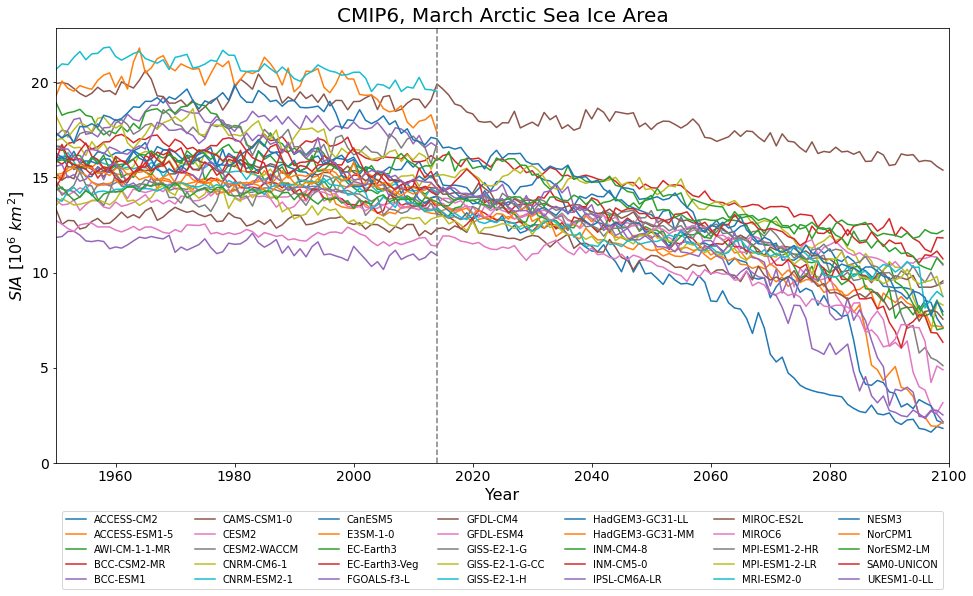

In [148]:
month_ = 3

fig = plt.figure(figsize=[16,8])

for model in list(SIA.keys()): #loop through all the models (xarray variables)
    SIA[model].sel(SSP='585').sel(month=month_).plot(label=model)

plt.axvline(2014, linestyle='--', color='0.5') #plot 2014, the last year of historical simulations
    
plt.legend(bbox_to_anchor=(0.5, -0.29), loc='lower center', borderaxespad=0., ncol=7)
plt.xlim(1950,2100)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.ylim(bottom=0)
plt.ylabel(r'$SIA \ [10^6 \ km^2]$', fontsize=16);
plt.yticks(fontsize=14)
plt.title('CMIP6, '+month_names[month_-1]+' Arctic Sea Ice Area', fontsize=20); #the title should change with the month_ you select

## Plot the multimodel means for the different SSPs

In [151]:
all_models = SIA.to_array(dim='model') #make all of the variables (models) a dimension with coordaintes

In [153]:
all_models #print out the dataset

<xarray.DataArray (model: 35, SSP: 3, month: 2, Year: 150)>
array([[[[1.62713070e+01, 1.60567627e+01, 1.61178436e+01, ...,
          1.29101028e+01, 1.31033487e+01, 1.32775002e+01],
         [5.56422424e+00, 5.97925282e+00, 6.43931389e+00, ...,
          9.43795592e-02, 1.20985396e-01, 1.21709406e-01]],

        [[1.62713070e+01, 1.60567627e+01, 1.61178436e+01, ...,
          1.09464312e+01, 1.08906240e+01, 1.11722050e+01],
         [5.56422424e+00, 5.97925282e+00, 6.43931389e+00, ...,
          5.74523211e-02, 3.22593302e-02, 2.50140801e-02]],

        [[1.62713070e+01, 1.60567627e+01, 1.61178436e+01, ...,
          8.42520332e+00, 7.59134197e+00, 7.12232447e+00],
         [5.56422424e+00, 5.97925282e+00, 6.43931389e+00, ...,
          5.38960239e-03, 1.01243902e-04, 4.09113243e-04]]],


       [[[1.49808741e+01, 1.48533268e+01, 1.55301094e+01, ...,
          1.23297873e+01, 1.21750813e+01, 1.16889563e+01],
         [5.93114805e+00, 5.80820227e+00, 4.91082954e+00, ...,
          6.70705020e-01, 9.65960085e-01, 9.91692126e-01]],

        [[1.49808741e+01, 1.48533268e+01, 1.55301094e+01, ...,
          9.91552448e+00, 1.02098846e+01, 1.03818197e+01],
         [5.93114805e+00, 5.80820227e+00, 4.91082954e+00, ...,
          1.35135174e-01, 7.56519809e-02, 8.70927945e-02]],

        [[1.49808741e+01, 1.48533268e+01, 1.55301094e+01, ...,
          7.19105864e+00, 7.19089556e+00, 7.13048697e+00],
         [5.93114805e+00, 5.80820227e+00, 4.91082954e+00, ...,
          3.60165746e-03, 3.78448609e-03, 7.02238316e-03]]],


       [[[1.66414490e+01, 1.66327877e+01, 1.58020096e+01, ...,
          1.24475050e+01, 1.28807898e+01, 1.22815752e+01],
         [4.30615568e+00, 5.14027071e+00, 4.88438034e+00, ...,
          8.41911077e-01, 8.56556714e-01, 1.00509620e+00]],

        [[1.66414490e+01, 1.66327877e+01, 1.58020096e+01, ...,
          1.18860407e+01, 1.18468246e+01, 1.21982794e+01],
         [4.30615568e+00, 5.14027071e+00, 4.88438034e+00, ...,
          2.64769625e-02, 1.03344589e-01, 3.96553688e-02]],

        [[1.66414490e+01, 1.66327877e+01, 1.58020096e+01, ...,
          7.86831903e+00, 8.55063915e+00, 7.76158619e+00],
         [4.30615568e+00, 5.14027071e+00, 4.88438034e+00, ...,
          1.51915657e-07, 2.87989348e-08, 3.34232411e-08]]],


       ...,


       [[[1.43507729e+01, 1.44906378e+01, 1.41004553e+01, ...,
                     nan,            nan,            nan],
         [5.60533333e+00, 5.83029413e+00, 4.68396425e+00, ...,
                     nan,            nan,            nan]],

        [[1.43507729e+01, 1.44906378e+01, 1.41004553e+01, ...,
          1.27327032e+01, 1.30665855e+01, 1.31477394e+01],
         [5.60533333e+00, 5.83029413e+00, 4.68396425e+00, ...,
          4.23396796e-01, 4.48866725e-01, 4.21278566e-01]],

        [[1.43507729e+01, 1.44906378e+01, 1.41004553e+01, ...,
          1.01443176e+01, 1.07730722e+01, 1.04450045e+01],
         [5.60533333e+00, 5.83029413e+00, 4.68396425e+00, ...,
          1.41012976e-02, 1.16816349e-03, 2.75630932e-02]]],


       [[[1.45201550e+01, 1.50065393e+01, 1.58273926e+01, ...,
                     nan,            nan,            nan],
         [6.93962383e+00, 6.76363993e+00, 7.38915539e+00, ...,
                     nan,            nan,            nan]],

        [[1.45201550e+01, 1.50065393e+01, 1.58273926e+01, ...,
                     nan,            nan,            nan],
         [6.93962383e+00, 6.76363993e+00, 7.38915539e+00, ...,
                     nan,            nan,            nan]],

        [[1.45201550e+01, 1.50065393e+01, 1.58273926e+01, ...,
                     nan,            nan,            nan],
         [6.93962383e+00, 6.76363993e+00, 7.38915539e+00, ...,
                     nan,            nan,            nan]]],


       [[[1.66520000e+01, 1.65040000e+01, 1.64910000e+01, ...,
          1.17490000e+01, 1.15810000e+01, 1.16360000e+01],
         [7.23700000e+00, 7.21700000e+00, 7.21800000e+00, ...,
          3.00000000e-02, 6.70000000e-02,

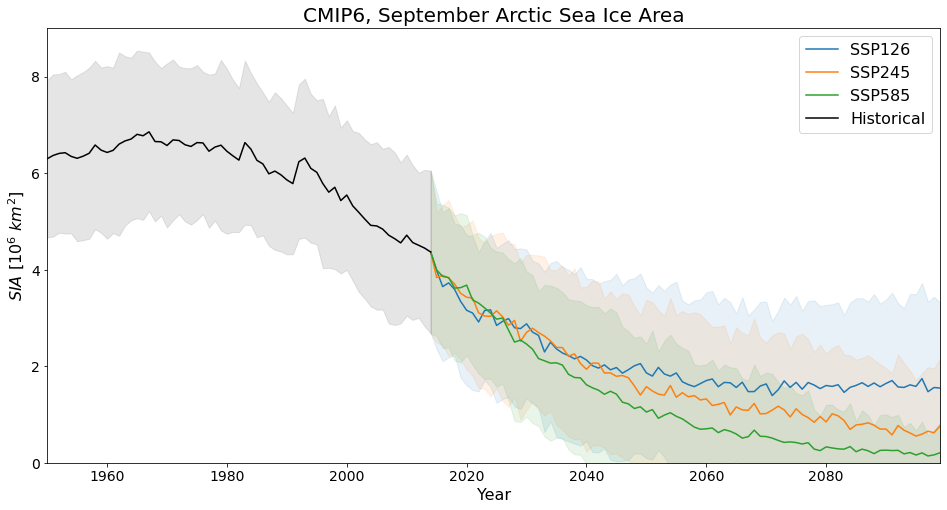

In [183]:
ssp_colors = ['tab:blue', 'tab:orange', 'tab:green']
month_ = 9

fig = plt.figure(figsize=[16,8])

for ssp_i, ssp in enumerate(multi_model_mean['SSP'].values):
    SSP_data = all_models.sel(month=month_).sel(SSP=ssp).sel(Year=slice('2014','2100'))
    
    #plot the multi model mean and standard deviation
    SSP_data.mean('model').plot(label='SSP'+ssp, color=ssp_colors[ssp_i])
    
    plt.fill_between(SSP_data['Year'].values, SSP_data.mean('model') - SSP_data.std('model'), 
                     SSP_data.mean('model') + SSP_data.std('model'), color=ssp_colors[ssp_i], alpha=0.1)

#plot the historical data (1950-2015) in black
hist_data = all_models.sel(month=month_).sel(SSP=ssp).sel(Year=slice('1950','2014'))
plt.plot(hist_data['Year'].values, hist_data.mean('model'), color='k', label='Historical')
plt.fill_between(hist_data['Year'].values, hist_data.mean('model') - hist_data.std('model'), 
                     hist_data.mean('model') + hist_data.std('model'), color='0.5', alpha=0.2)

plt.legend(fontsize=16)
plt.xlim(1950,2099)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.ylim(bottom=0)
plt.ylabel(r'$SIA \ [10^6 \ km^2]$', fontsize=16);
plt.yticks(fontsize=14)
plt.title('CMIP6, '+month_names[month_-1]+' Arctic Sea Ice Area', fontsize=20);